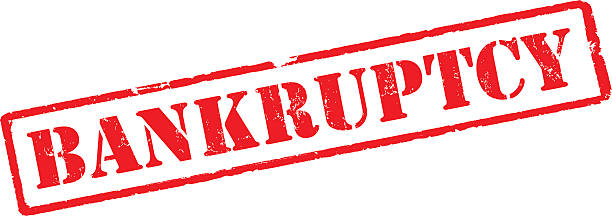

# Bankruptcy Analysis

A company faces bankruptcy when they are unable to pay off their debts. The Taiwan Economic Journal for the years 1999 to 2009 has listed the details of company bankruptcy based on the business regulations of the Taiwan Stock Exchange. The Taiwan Stock Exchange was established in 1961 and began operating as a stock exchange on 9 February 1962. It is a financial institution located in Taipei, Taiwan. It has over 900 listed companies. The data includes a majority of numerical attributes that help understand the possibility of bankruptcy.  

This notebook aims at analyzing the possibility of whether an organization would face bankruptcy. The main focus of this notebook is to demonstrate concepts listed as follows:<br>
- **Dealing with imbalanced datasets the right way** <br>(A detailed look on all the do's and don't has been demonstrated in "[Credit Fraud || Dealing with Imbalanced Datasets](https://www.kaggle.com/janiobachmann/credit-fraud-dealing-with-imbalanced-datasets)" notebook by "[Janio Martinez Bachmann](https://www.kaggle.com/janiobachmann)". This notebook provides complete clarity for dealing with imbalanced datasets)<br>
    - An imbalanced dataset is a situation when there is an unequal distribution of classes in the dataset. We can solve this by either upsampling - introducing minority class at power with majority class or downsampling - reducing majority class to match the size of minority class<br><br>
    
- **Finding the best attributes to work with through feature selection**
    - We are now dealing with over 50 attributes in this dataset, let us just play around and demonstrate how we can programmatically pick the best features, and analyze how it affects our model.

<br>
Kindly provide an upvote if this notebook was useful. Also, I would greatly appreciate any feedback or suggestions for improvement. Thank-you :)



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from random import randint
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import classification_report, confusion_matrix, f1_score,accuracy_score, precision_score, recall_score, roc_auc_score 

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

import warnings
warnings.filterwarnings("ignore")

# Data Loading and Cleaning

In [2]:
data = pd.read_csv("/kaggle/input/company-bankruptcy-prediction/data.csv")
data.columns = [i.title().strip() for i in list(data.columns)]

row = data.shape[0]
col = data.shape[1]
print("The number of rows within the dataset are {} and the number of columns is {}".format(row,col))

The number of rows within the dataset are 6819 and the number of columns is 96


In [3]:
data.isnull().sum().sort_values(ascending=False).head()

Bankrupt?                                                  0
Roa(C) Before Interest And Depreciation Before Interest    0
Total Expense/Assets                                       0
Total Income/Total Expense                                 0
Retained Earnings To Total Assets                          0
dtype: int64

Since there are no missing values, we can jump into analyzing the data

# Data Visualization

Below is the list of a variety of color palette that can be used while creating visuals

In [4]:
colors = ['Accent', 'Accent_r', 'Blues', 'Blues_r', 'BrBG', 'BrBG_r', 'BuGn', 'BuGn_r', 'BuPu', 'BuPu_r', 'CMRmap',
          'CMRmap_r', 'Dark2', 'Dark2_r', 'GnBu', 'GnBu_r', 'Greens', 'Greens_r', 'Greys', 'Greys_r', 'OrRd', 'OrRd_r', 
          'Oranges', 'Oranges_r', 'PRGn', 'PRGn_r', 'Paired', 'Paired_r', 'Pastel1', 'Pastel1_r', 'Pastel2', 'Pastel2_r', 
          'PiYG', 'PiYG_r', 'PuBu', 'PuBuGn', 'PuBuGn_r', 'PuBu_r', 'PuOr', 'PuOr_r', 'PuRd', 'PuRd_r', 'Purples', 'Purples_r', 
          'RdBu', 'RdBu_r', 'RdGy', 'RdGy_r', 'RdPu', 'RdPu_r', 'RdYlBu', 'RdYlBu_r', 'RdYlGn', 'RdYlGn_r', 'Reds', 'Reds_r', 
          'Set1', 'Set1_r', 'Set2', 'Set2_r', 'Set3', 'Set3_r', 'Spectral', 'Spectral_r', 'Wistia', 'Wistia_r', 'YlGn', 'YlGnBu', 
          'YlGnBu_r', 'YlGn_r', 'YlOrBr', 'YlOrBr_r', 'YlOrRd', 'YlOrRd_r', 'afmhot', 'afmhot_r', 'autumn', 'autumn_r', 'binary', 
          'binary_r', 'bone', 'bone_r', 'brg', 'brg_r', 'bwr', 'bwr_r', 'cividis', 'cividis_r', 'cool', 'cool_r', 'coolwarm', 
          'coolwarm_r', 'copper', 'copper_r', 'crest', 'crest_r', 'cubehelix', 'cubehelix_r', 'flag', 'flag_r', 'flare', 
          'flare_r', 'gist_earth', 'gist_earth_r', 'gist_gray', 'gist_gray_r', 'gist_heat', 'gist_heat_r', 'gist_ncar', 
          'gist_ncar_r', 'gist_rainbow', 'gist_rainbow_r', 'gist_stern', 'gist_stern_r', 'gist_yarg', 'gist_yarg_r', 'gnuplot', 
          'gnuplot2', 'gnuplot2_r', 'gnuplot_r', 'gray', 'gray_r', 'hot', 'hot_r', 'hsv', 'hsv_r', 'icefire', 'icefire_r', 
          'inferno', 'inferno_r', 'jet', 'jet_r', 'magma', 'magma_r', 'mako', 'mako_r', 'nipy_spectral', 'nipy_spectral_r', 
          'ocean', 'ocean_r', 'pink', 'pink_r', 'plasma', 'plasma_r', 'prism', 'prism_r', 'rainbow', 'rainbow_r', 'rocket', 
          'rocket_r', 'seismic', 'seismic_r', 'spring', 'spring_r', 'summer', 'summer_r', 'tab10', 'tab10_r', 'tab20', 
          'tab20_r', 'tab20b', 'tab20b_r', 'tab20c', 'tab20c_r', 'terrain', 'terrain_r', 'turbo', 'turbo_r', 'twilight', 
          'twilight_r', 'twilight_shifted', 'twilight_shifted_r', 'viridis', 'viridis_r', 'vlag', 'vlag_r', 'winter', 'winter_r']

<AxesSubplot:xlabel='Bankrupt?', ylabel='count'>

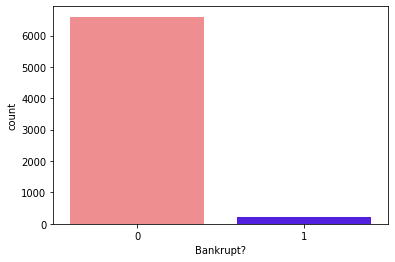

In [5]:
value = randint(0, len(colors)-1)

sns.countplot('Bankrupt?',data=data,palette = colors[value])

The records are observed to be highly imbalanced. Thus it is necessary to consider balancing the dataset through "Upsampling or Downsampling" techniques.
<br><br>Through data.info(), we observed that we have a majority of "float64" data. The categorical data is distinguished as binary 1 and 0, thus stored as "int64". We separate the numeric and categoric data to analyze our dataset.

In [6]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
categorical_features = data.dtypes[data.dtypes == 'int64'].index

data[categorical_features].columns.tolist()

['Bankrupt?', 'Liability-Assets Flag', 'Net Income Flag']

There are only three categorical data columns, we will first explore these columns 

0    6811
1       8
Name: Liability-Assets Flag, dtype: int64


<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

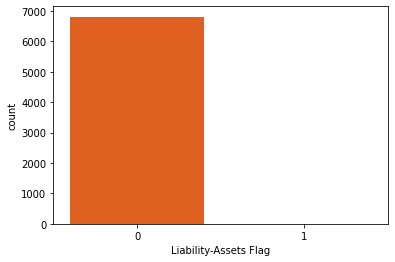

In [7]:
value = randint(0, len(colors)-1)

print(data['Liability-Assets Flag'].value_counts())
sns.countplot('Liability-Assets Flag',data=data,palette = colors[value])

The "Liability-Assets" flag denotes the status of an organization, where if the total liability exceeds total assets, the flagged value will be 1, else the value is 0. A majority number of times, organizations/company's assets are more than their liabilities.

Liability-Assets Flag  Bankrupt?
0                      0            6597
                       1             214
1                      1               6
                       0               2
dtype: int64


<AxesSubplot:xlabel='Liability-Assets Flag', ylabel='count'>

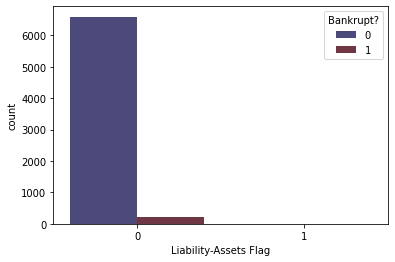

In [8]:
value = randint(0, len(colors)-1)

print(data[['Liability-Assets Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Liability-Assets Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

A small portion of organizations suffers bankruptcy, although possessing more assets than their liabilities.

1    6819
Name: Net Income Flag, dtype: int64


<AxesSubplot:xlabel='Net Income Flag', ylabel='count'>

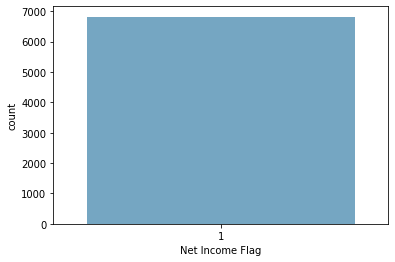

In [9]:
value = randint(0, len(colors)-1)

print(data['Net Income Flag'].value_counts())
sns.countplot('Net Income Flag',data=data,palette = colors[value])

The "Net Income" flag denotes the status of an organization's income in the last two years, where if the net income is negative for the past two years, the flagged value will be 1, else the value is 0. We observe that all the records have been exhibiting a loss for the past two years.

Net Income Flag  Bankrupt?
1                0            6599
                 1             220
dtype: int64


<AxesSubplot:xlabel='Net Income Flag', ylabel='count'>

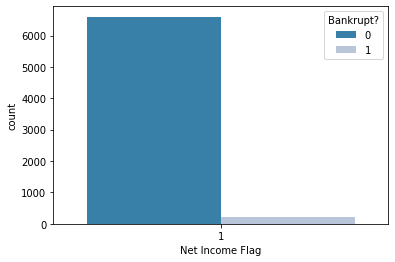

In [10]:
value = randint(0, len(colors)-1)

print(data[['Net Income Flag','Bankrupt?']].value_counts())
sns.countplot(x = 'Net Income Flag',hue = 'Bankrupt?',data = data,palette = colors[value])

Many organizations that have suffered losses for the past two years have stabilized their business, thus avoiding bankruptcy.

In [11]:
positive_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values(ascending=False)[:6].index.tolist()
negative_corr = data[numeric_features].corrwith(data["Bankrupt?"]).sort_values()[:6].index.tolist()

positive_corr = data[positive_corr + ["Bankrupt?"]].copy()
negative_corr = data[negative_corr + ["Bankrupt?"]].copy()

For the sake of simplicity, we analyze the six top positively and negatively correlated attributes.

In [12]:
def corrbargraph(x_value, y_value):
    
    plt.figure(figsize=(15,8))
    value = randint(0, len(colors)-1)

    for i in range(1,7):
        plt.subplot(2,3,i)  
        sns.barplot(x = x_value, y = y_value[i-1],data = data,palette = colors[value])

    plt.tight_layout(pad=0.5)

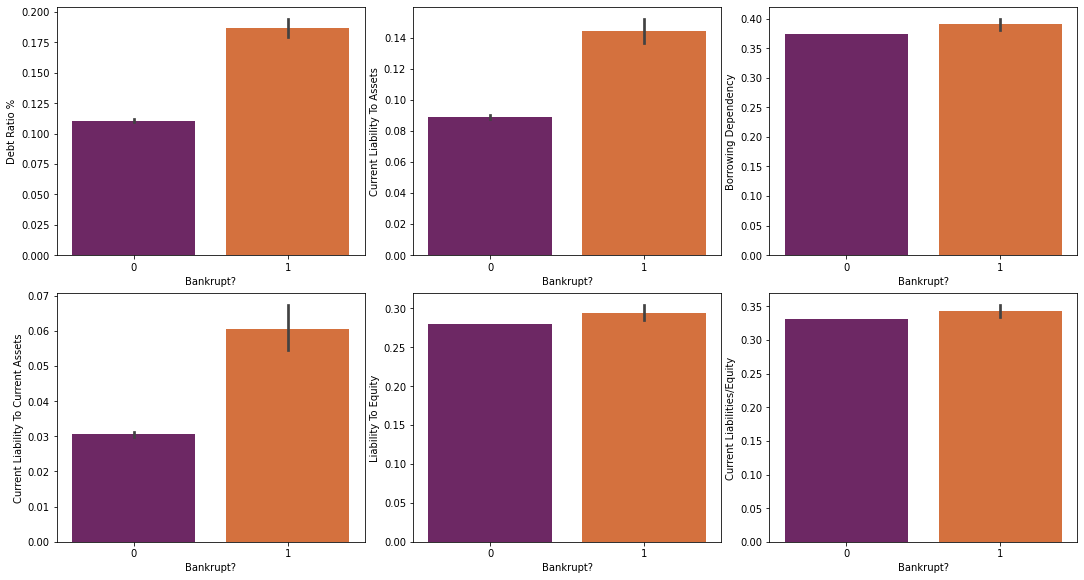

In [13]:
x_value = positive_corr.columns.tolist()[-1]
y_value = positive_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

We see that three attributes - "Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" are commonly high in bankrupt organizations.

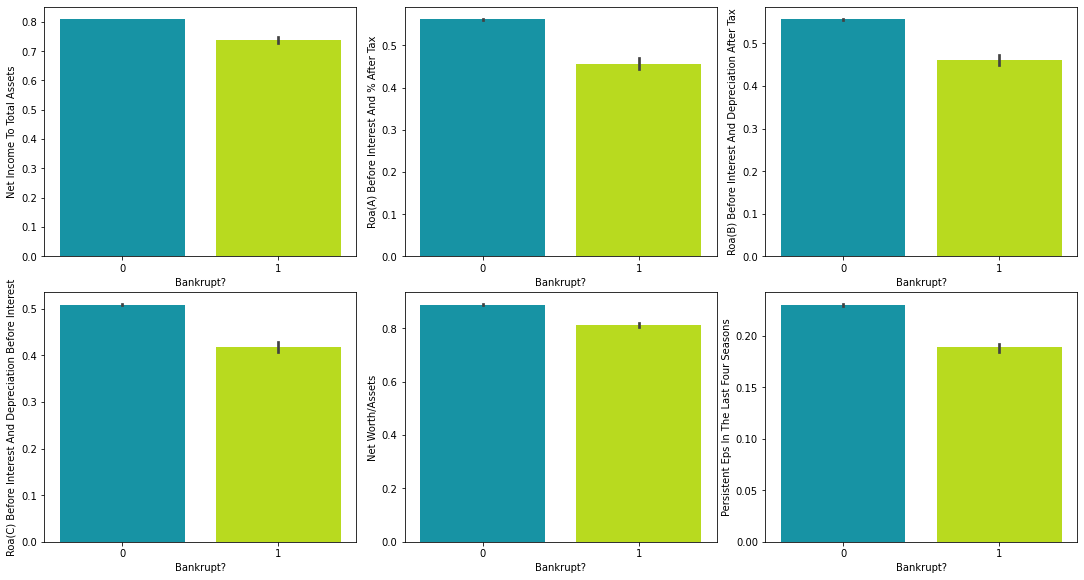

In [14]:
x_value = negative_corr.columns.tolist()[-1]
y_value = negative_corr.columns.tolist()[:-1]

corrbargraph(x_value, y_value)

These attributes show us that the more the assets and earing of a company, the less likely is the organization to be bankrupt.
<br>Let us check the relation of top six positive and negative correlation attributes among eachother

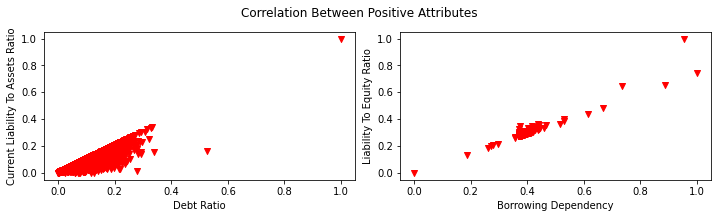

In [15]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Positive Attributes")

plt.subplot(1,2,1)
plt.xlabel("Debt Ratio")
plt.ylabel("Current Liability To Assets Ratio")
plt.scatter(data["Debt Ratio %"],data["Current Liability To Assets"], marker='v',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("Borrowing Dependency")
plt.ylabel("Liability To Equity Ratio")
plt.scatter(data["Borrowing Dependency"],data["Liability To Equity"], marker='v',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a high correlation with the target attribute.

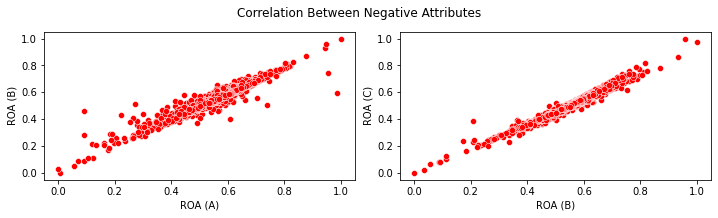

In [16]:
plt.figure(figsize=(10,3))

plt.suptitle("Correlation Between Negative Attributes")

plt.subplot(1,2,1)
plt.xlabel("ROA (A)")
plt.ylabel("ROA (B)")
sns.scatterplot(data=data, x='Roa(A) Before Interest And % After Tax', y='Roa(B) Before Interest And Depreciation After Tax',color = 'red')

plt.subplot(1,2,2)
plt.xlabel("ROA (B)")
plt.ylabel("ROA (C)")
sns.scatterplot(data=data, x='Roa(B) Before Interest And Depreciation After Tax', y='Roa(C) Before Interest And Depreciation Before Interest',color = 'red')

plt.tight_layout(pad=0.8)

There is a positive relation between attributes that have a low correlation with the target attribute.

<AxesSubplot:>

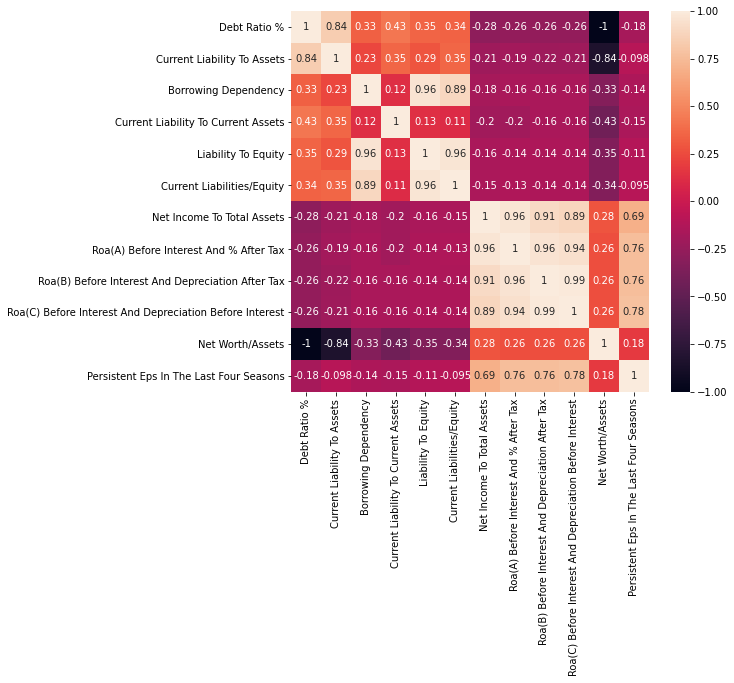

In [17]:
relation = positive_corr.columns.tolist()[:-1] + negative_corr.columns.tolist()[:-1]
plt.figure(figsize=(8,7))
sns.heatmap(data[relation].corr(),annot=True)

A total correlation of the top 12 attributes are given above

# Summary of Analysis

- The number of organizations that have gone bankrupt in 10 years between 1999 – 2000 is few.
- Several companies possess many assets, which is always a good sign for an organization.
- An organization cannot guarantee not being bankrupt, although owning several assets.
- The organizations in the dataset are running into losses for the past two years as their net income poses to be negative.
- Very few of the organizations that have had negative income in the past two years suffer from bankruptcy.
- It is observed that “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets" attributes are a few of the attributes that have a high correlation with the target attribute.
- An increase in the values of the attributes “Debt Ratio %, Current Liability To Assets, Current Liability To Current Assets” causes an organization to suffer heavy losses, thus resulting in bankruptcy.
- An increase in the values of the attributes that have a negative correlation with the target attribute helps an organization avoid bankruptcy.
- There seems to be a relation between attributes that have a high correlation with the target attribute and a low correlation with the target attribute.
- We observed several correlations among the top 12 attributes, one of which being “Net Worth/Assets and Debt Ratio %” that is negatively correlated with one another.


# Data Modeling

In [18]:
numeric_features = data.dtypes[data.dtypes != 'int64'].index
data[numeric_features] = data[numeric_features].apply(lambda x: (x - x.mean()) / (x.std()))

data[numeric_features] = data[numeric_features].fillna(0)

The numeric attributes have been normalized.<br><br>

Our dataset is highly imbalanced. Thus before training the model, we need to deal with this data. Let us lay down some steps we must follow when we come across an imbalanced dataset.
- Split the dataset into training and testing sets (80% - 20%). We preserve the 20% testing set for the final evaluation. 
- Through "Stratified K Fold Cross-Validation" we will now distribute the 80% training set into further training and testing splits.
- Since we are dealing with over 50 features, we use "Randomized Search Cross-Validation" as this technique proves to perform better with many features.

In [19]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_without_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = data.drop('Bankrupt?', axis=1)
    y = data['Bankrupt?']
    
    #Traditional split of the dataset 80% - 20%
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    #Proportional split of 80% data with respect to the class of the target feature ie. [1,0]
    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)
     
    #Identifying the best parameters through RandomizedSearchCV()
    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    #Evaluation with against 20% unseen testing data
    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [20]:
print("K Nearest Neighbour")
TrainedModel = taining_without_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.67      0.94      0.78        51

    accuracy                           0.98      1364
   macro avg       0.83      0.96      0.89      1364
weighted avg       0.99      0.98      0.98      1364



In [21]:
print("Logistic Regression")
TrainedModel = taining_without_feature_selection({"penalty": ['l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}, LogisticRegression(solver='liblinear'), data, "Logistic Regression")
Models = Models.append(TrainedModel,ignore_index=True)

Logistic Regression

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      1313
           1       0.23      0.82      0.36        51

    accuracy                           0.89      1364
   macro avg       0.61      0.86      0.65      1364
weighted avg       0.96      0.89      0.92      1364



In [22]:
print("DecisionTree Classifier")
TrainedModel = taining_without_feature_selection({"criterion": ["gini", "entropy"], "max_depth": list(range(2,4,1)),"min_samples_leaf": list(range(5,7,1))}, DecisionTreeClassifier(), data, "DecisionTree Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

DecisionTree Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.85      0.92      1313
           1       0.20      0.94      0.32        51

    accuracy                           0.85      1364
   macro avg       0.60      0.90      0.62      1364
weighted avg       0.97      0.85      0.90      1364



In [23]:
print("Random Forest Classifier")
TrainedModel = taining_without_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), data, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.81      0.92      0.86        51

    accuracy                           0.99      1364
   macro avg       0.90      0.96      0.93      1364
weighted avg       0.99      0.99      0.99      1364



In [24]:
print("Support Vector Classifier")
TrainedModel = taining_without_feature_selection({'C': [1,10,20],'kernel': ['rbf','linear']},  SVC(), data, "Support Vector Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Support Vector Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.96      0.98      1313
           1       0.47      0.90      0.62        51

    accuracy                           0.96      1364
   macro avg       0.73      0.93      0.80      1364
weighted avg       0.98      0.96      0.96      1364



In [25]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
3,Random Forest Classifier,98.9%,0.81,0.92,0.86,0.96
0,K Nearest Neighbour,98.02%,0.67,0.94,0.78,0.96
4,Support Vector Classifier,95.82%,0.47,0.90,0.62,0.93
1,Logistic Regression,89.22%,0.23,0.82,0.36,0.86
2,DecisionTree Classifier,85.26%,0.20,0.94,0.32,0.90


We see that among all the models "**Random Forest Classifier and K Nearest Neighbour**" have the highest **F-1 Score**. Thus, we may use these models to train our data. <br><br>At the very beginning of this notebook, we spoke about feature selection.<br><br>
Since my knowledge in finance is limited, why not let machine learning help me? :P<br><br>
"SelectKBest"  is used to select features that add the most value to the target variable

In [26]:
Models = pd.DataFrame(columns=['Algorithm','Model Score','Precision','Recall','F1 score','ROC-AUC score'])

def taining_with_feature_selection(Parameters, Model, Dataframe, Modelname):
    
    data = Dataframe.copy()
    
    X = data.drop('Bankrupt?', axis=1)
    y = data['Bankrupt?']
    
    '''
    Feature Selection Process: 
    class sklearn.feature_selection.SelectKBest(score_func=<function>, k=<number of features>
        score_func - Scoring measure
        k - Total features to be returned 
    '''
    
    fs = SelectKBest(score_func=f_classif, k=int((data.shape[1]*85)/100))

    X = fs.fit_transform(X, y)
    
    X = pd.DataFrame(X)
    y = pd.DataFrame(y)
    
    x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    x_train, x_test, y_train, y_test = x_train.values, x_test.values, y_train.values, y_test.values

    sf = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

    for train_index, test_index in sf.split(x_train, y_train):
        sf_x_train, sf_x_test = X.iloc[train_index], X.iloc[test_index]
        sf_y_train, sf_y_test = y.iloc[train_index], y.iloc[test_index]

    sf_x_train, sf_x_test, sf_y_train, sf_y_test = sf_x_train.values, sf_x_test.values, sf_y_train.values, sf_y_test.values
    
    model_parameter_sm = Parameters

    rand_model = RandomizedSearchCV(Model, model_parameter_sm, n_iter=4)

    for train, test in sf.split(sf_x_train, sf_y_train):
        pipeline = imbalanced_make_pipeline(SMOTE(sampling_strategy='minority'), rand_model) 
        fitting_model = pipeline.fit(sf_x_train[train], sf_y_train[train])
        best_model = rand_model.best_estimator_

    print()
    print("Evaluation Of Models")  

    sm = SMOTE(sampling_strategy='minority', random_state=42)
    Xsm_train, ysm_train = sm.fit_resample(sf_x_train, sf_y_train)
    
    print()
    print("Random Model Evaluation")  
    
    final_model_sm = rand_model.best_estimator_
    final_model_sm.fit(Xsm_train, ysm_train)

    prediction = final_model_sm.predict(x_test)

    print(classification_report(y_test, prediction))
    
    model = {}

    model['Algorithm'] = Modelname
    model['Model Score'] = str(round((accuracy_score(y_test, prediction)*100),2)) + "%"
    model['Precision'] = round(precision_score(y_test, prediction),2)
    model['Recall'] = round(recall_score(y_test, prediction),2)
    model['F1 score'] = round(f1_score(y_test, prediction),2)
    model['ROC-AUC score'] = round(roc_auc_score(y_test, prediction),2)
    
    return model

In [27]:
print("Random Forest Classifier")
TrainedModel = taining_with_feature_selection({"max_depth": [3, 5, 10, None],"n_estimators": [100, 200, 300, 400, 500]},  RandomForestClassifier(), data, "Random Forest Classifier")
Models = Models.append(TrainedModel,ignore_index=True)

Random Forest Classifier

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1313
           1       0.80      0.88      0.84        51

    accuracy                           0.99      1364
   macro avg       0.90      0.94      0.92      1364
weighted avg       0.99      0.99      0.99      1364



In [28]:
print("K Nearest Neighbour")
TrainedModel = taining_with_feature_selection({"n_neighbors": list(range(2,5,1)), 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}, KNeighborsClassifier(), data,"K Nearest Neighbour")
Models = Models.append(TrainedModel,ignore_index=True)

K Nearest Neighbour

Evaluation Of Models

Random Model Evaluation
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1313
           1       0.64      0.94      0.76        51

    accuracy                           0.98      1364
   macro avg       0.82      0.96      0.88      1364
weighted avg       0.98      0.98      0.98      1364



In [29]:
Models.sort_values('F1 score',ascending=False)

,Algorithm,Model Score,Precision,Recall,F1 score,ROC-AUC score
0,Random Forest Classifier,98.75%,0.80,0.88,0.84,0.94
1,K Nearest Neighbour,97.8%,0.64,0.94,0.76,0.96


So, as we can see narrowing the data features may not always provide better results it seems! But there is always a possibility that the results may appear few points better than that of the entire dataset features.